In [333]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [334]:
def partial_derivative(g, Y, i, epsilon = 1e-6):
    # del g/del yi
    g1 = g(Y)
    Y[i] += epsilon
    g2 = g(Y)
    return (g2 - g1) / epsilon

def trapezoidal_rule(Y, x_n, Y_n, h):
    return Y_n + h / 2 * (f(x_n + h, Y) + f(x_n, Y_n)) - Y

def newton_raphson(Y_n, x_n, h, iterations = 10000, tolerance = 1e-6):
    Y_k = Y_n + h*f(x_n, Y_n)
    J_k = np.zeros((N, N))
    # J_k
    # J_k[i, j] = del Fi / del yj
    error = 1
    # print("starting Newton Rapson")
    while iterations and error > tolerance:
        for i in range(N):
            for j in range(N):
                def Fi(Y_):
                    return trapezoidal_rule(Y_, x_n, Y_n, h)[i]
                J_k[i, j] = partial_derivative(Fi, Y_k, j)
        # print(" J = \n",J_k)
        # print(" y* => ",Y_k)
        Y_k = Y_k - np.linalg.inv(J_k) @ trapezoidal_rule(Y_k, x_n, Y_n, h)
        iterations -= 1
        error = np.linalg.norm(trapezoidal_rule(Y_k, x_n, Y_n, h))
    return Y_k

In [335]:
def equation_solver(x0, x1, num_points, Y0, N):
    h = (x1 - x0) / num_points
    Y_n = Y0
    x_n = x0
    '''
    Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
    '''
    output = np.zeros((N, num_points + 1))
    for i in range(N):
        output[i][0] = Y_n[i]
    
    # print(Y_n)
    for n in range(1, num_points + 1):
        '''
        Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
        Now we have to solve Y_(n + 1) [vector of size Nx1]
        Newton-Rapson
        F(Y_(n + 1)) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n)) - Y_(n + 1) 
        Find Y_(n + 1) = [y1, y2, ..., yN] s.t
        F(Y_(n + 1)) = 0
        '''
        # print("Y = ",Y_n)
        Y_n = newton_raphson(Y_n, x_n, h)
        x_n += h
        for i in range(N):
            output[i][n] = Y_n[i]

    return output


In [336]:
'''
Functions 
'''
def function_1(x, Y):
    return  -2 * Y[0] + Y[1] - 2 * Y[2]

def function_2(x, Y):
    return Y[0] - 2 * Y[1] + 2 * Y[2]

def function_3(x, Y):
    return 3 * Y[0] - 3 * Y[1] + 5 * Y[2]

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y), function_3(x, Y)])

N = 3  # Number of Functions

x0, x1 = 0, 1
Y0 = np.array([-2, 2, 4])

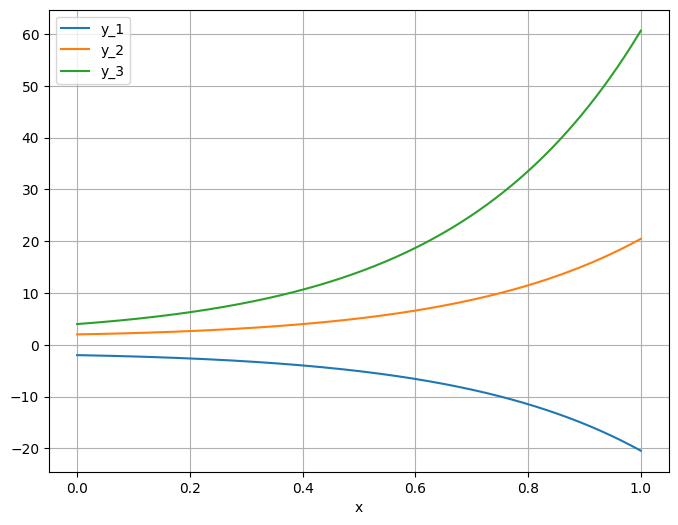

In [337]:
num_points = 10000
x_array = np.linspace(x0, x1, num_points + 1)
y_array = equation_solver(x0, x1, num_points, Y0, N)
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(x_array, y_array[i], label=f'y_{i + 1}')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save.png')
plt.show()

WEEK 5  
a y'' + b y' + c y = g(t)

consider the below substitution  
y1 = y  
y2 = y'    

a y2' + b y2 + c y1 = g(t)

Now the system of equations are   
y1' = y2  
y2' = -b/a y2 - c/a y1 + g(t)/a    

In [338]:
a = 1
b = 1
c = 1

def g(x, A = 1, f_ = 1, c_ = np.pi):
    # A sin(2*pi*f_ + c_)
    return A * np.sin(2*np.pi*f_*x + c_)

def function_1(x, Y):
    return  Y[1]
def function_2(x, Y):
    return -b/a * Y[1] - c/a * Y[0] + g(x)/a

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y)])

N = 2  # Number of Functions

x0, x1 = 0, 40
Y0 = np.array([0, 0])

In [339]:
num_points = 10000
t_array = np.linspace(x0, x1, num_points + 1)

alpha =  0.025313631977177762
beta =  -0.004133492238317597
c1 =  -0.18126892549017007
c2 =  0.004133492238317597


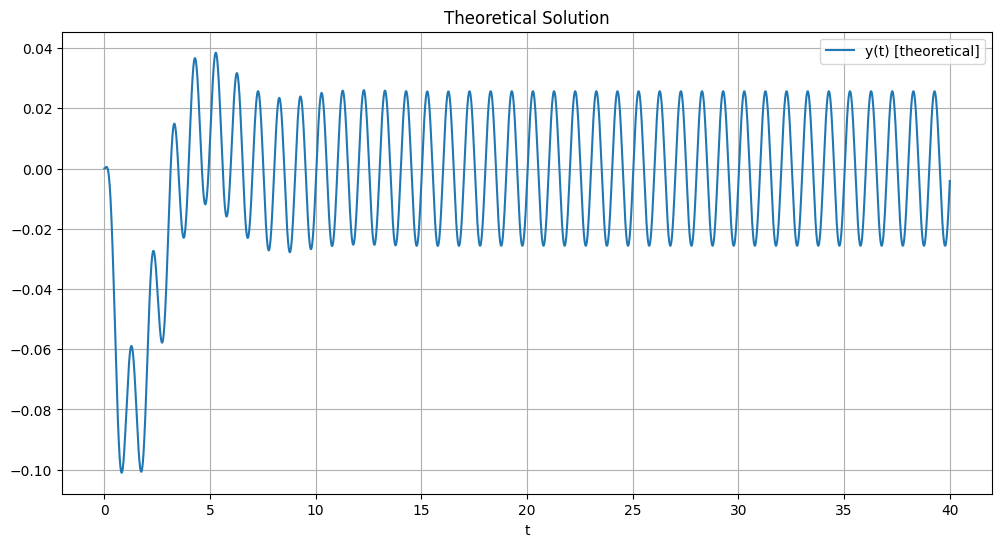

In [340]:
# Theoretical solution
# y(t) = alpha * sin(2*pi*t) + beta * cos(2*pi*t) + e^(-t/2)(c1*sin(sqrt(3)/2*t) + c2 cos(sqrt(3)/2*t))
alpha = (4*np.pi**2 - 1)/(4*np.pi**2 + (1-4*np.pi**2)**2)
beta = (-2*np.pi)/(4*np.pi**2 + (1-4*np.pi**2)**2)
c2 = - beta
c1 = - (4 * np.pi / np.sqrt(3)) * alpha - beta / np.sqrt(3)
print("alpha = ",alpha)
print("beta = ",beta)
print("c1 = ",c1)
print("c2 = ",c2)

y_th = alpha * np.sin(2*np.pi*t_array) + beta * np.cos(2*np.pi*t_array) + np.exp(-t_array/2)*(c1*np.sin(np.sqrt(3)/2*t_array) + c2 * np.cos(np.sqrt(3)/2*t_array))

plt.figure(figsize=(12, 6))
plt.title("Theoretical Solution")
plt.plot(t_array, y_th, label='y(t) [theoretical]')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()

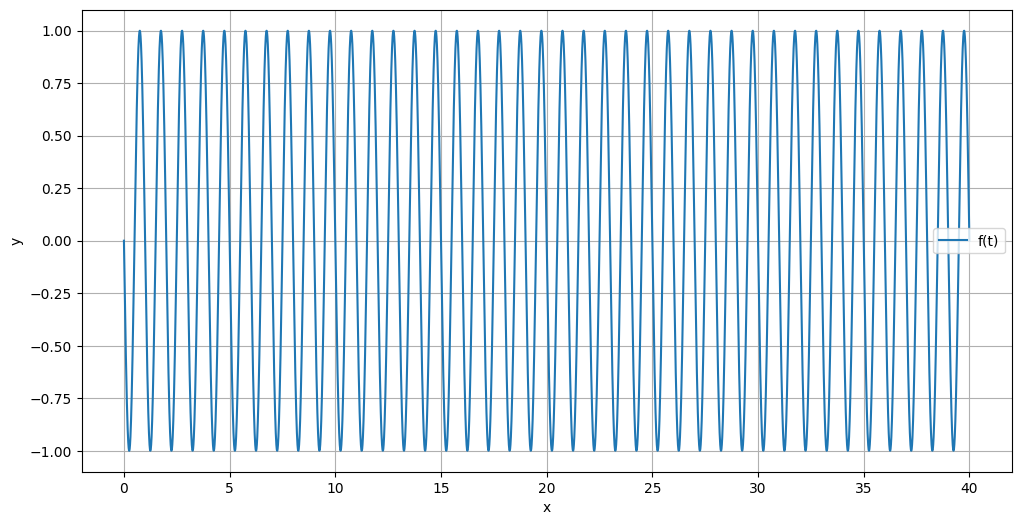

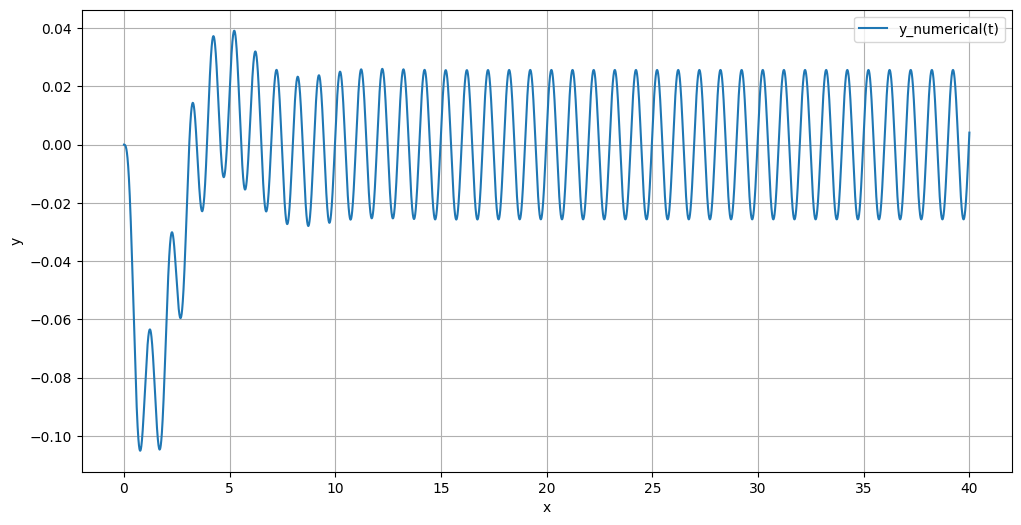

In [341]:
y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label=f'y_numerical(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

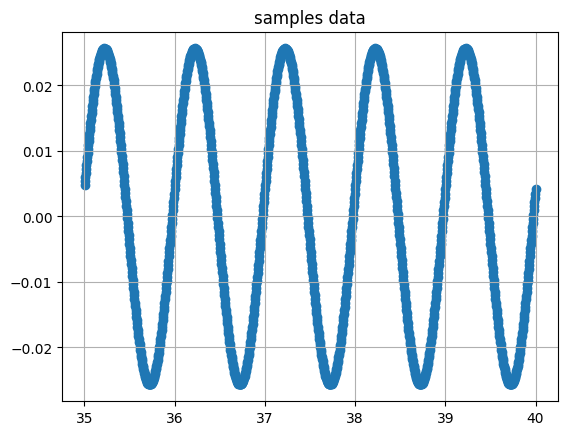

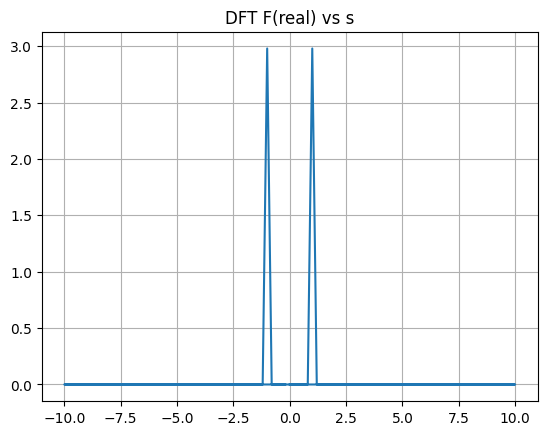

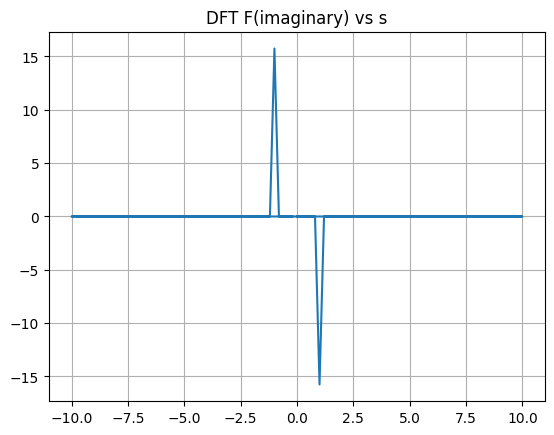

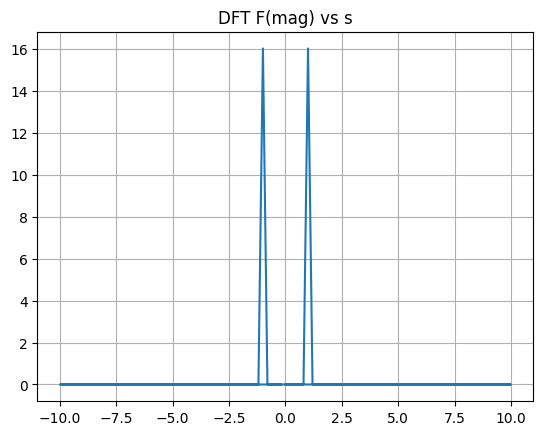

From DFT
Amplitude =  0.02564616000621878
Frequency =  0.9999999999987779


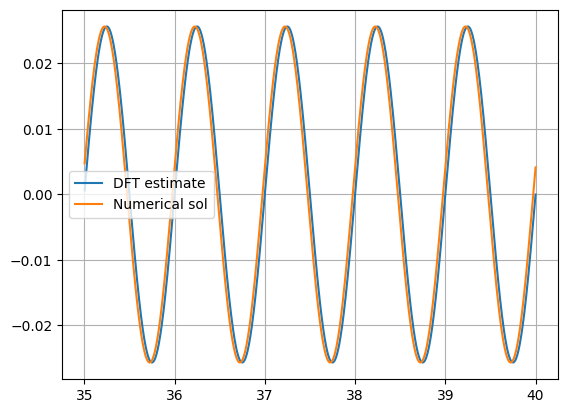

In [342]:
# DFT to check results
# Amp * sin(2*pi*f*t + phi)
def find_Af(signal, t):
    # Compute the DFT
    dft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=t[1] - t[0])  # Frequency bins

    ind = []
    for x in range(freqs.size):
        if(abs(freqs[x]) < 10):
            ind.append(x)
    
    plt.title("DFT F(real) vs s")
    plt.plot(freqs[ind], np.real(dft_result[ind]))
    plt.grid()
    plt.show()
    
    plt.title("DFT F(imaginary) vs s")
    plt.plot(freqs[ind], np.imag(dft_result[ind]))
    plt.grid()
    plt.show()

    plt.title("DFT F(mag) vs s")
    plt.plot(freqs[ind], np.abs(dft_result[ind]))
    plt.grid()
    plt.show()

    # Finding the peak frequency
    peak_index = np.argmax(np.abs(dft_result))
    peak_freq = freqs[peak_index]

    # Finding amplitude from the magnitude at the peak frequency
    amplitude = 2 * np.abs(dft_result[peak_index]) / len(signal)

    return amplitude, abs(peak_freq)

pts = 1250
t = t_array[-pts:]
signal = y_array[0][-pts:]
plt.scatter(t,signal)
plt.title("samples data")
plt.grid()
plt.show()

Amp,f_ = find_Af(signal,t)
print("From DFT")
print("Amplitude = ",Amp)
print("Frequency = ",f_)
plt.plot(t, Amp * np.sin(2*np.pi*f_*t), label = "DFT estimate")
plt.plot(t, signal, label = "Numerical sol")
plt.legend()
plt.grid()
plt.show()

Amp_theoretical =  0.025648893191719372
f_theoretical =  1


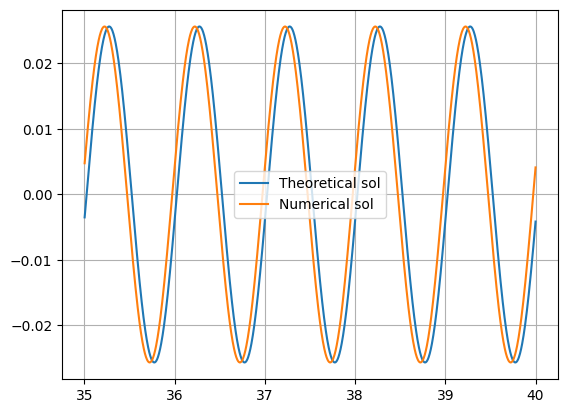

In [343]:
print("Amp_theoretical = ",np.sqrt(alpha**2 + beta**2))
print("f_theoretical = ",1)
plt.plot(t,y_th[-pts:], label = "Theoretical sol")
plt.plot(t, signal, label = "Numerical sol")
plt.legend()
plt.grid()
plt.show()

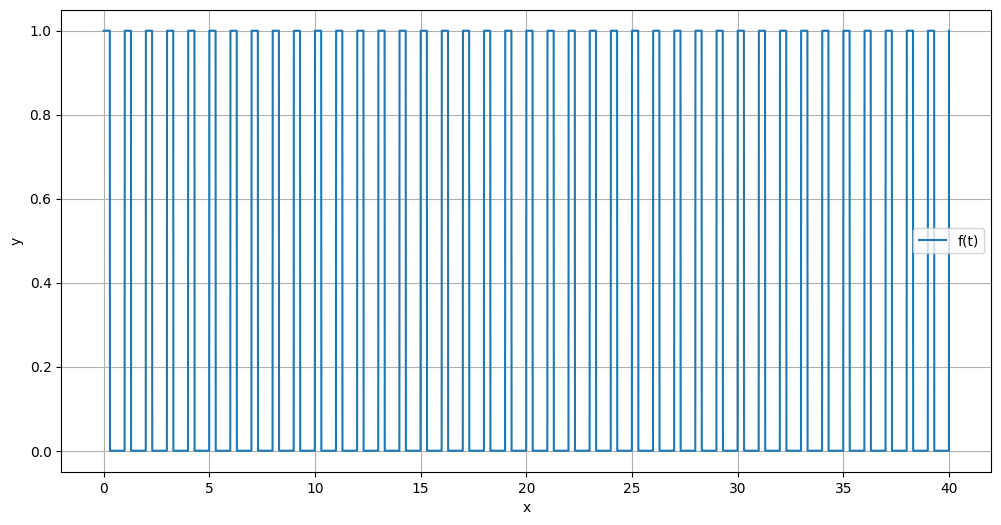

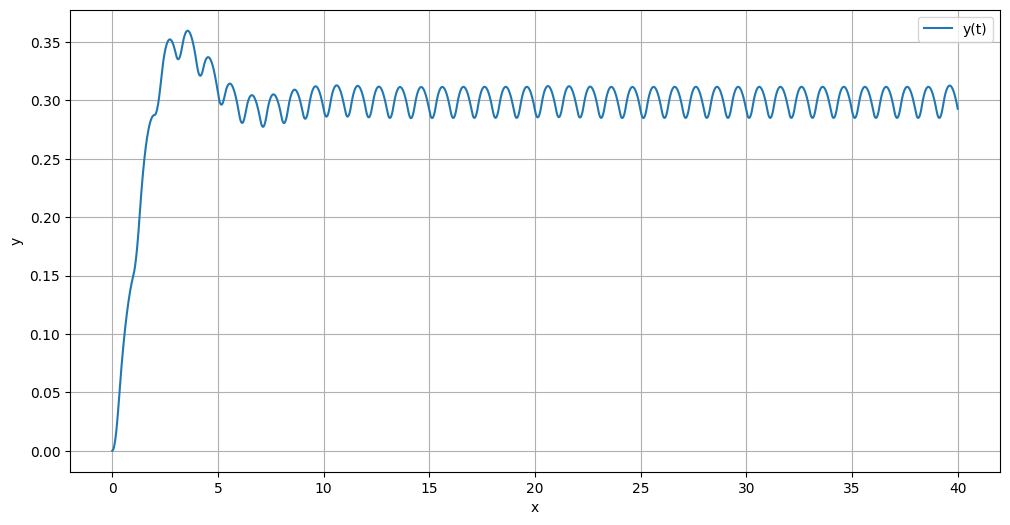

In [344]:
def g(x, t1 = 0.3):
    x = x - np.floor(x)
    if(x < t1):
        return 1
    return 0

y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_2.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label=f'y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_3.png')
plt.show()

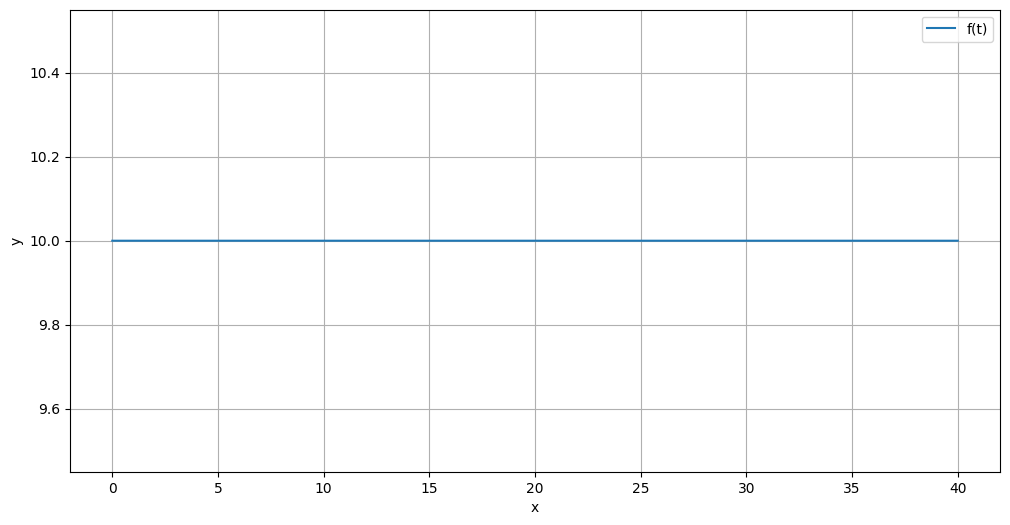

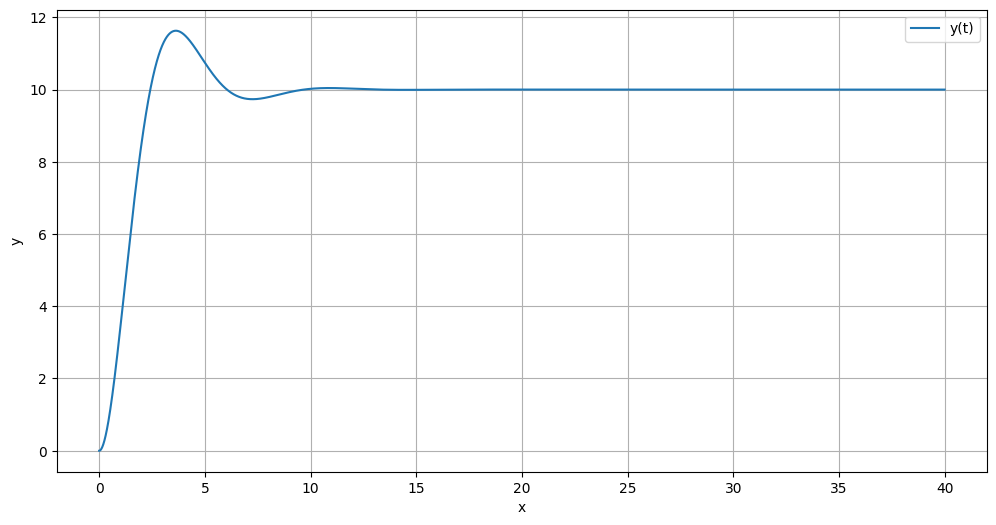

In [345]:
def g(x, c_ = 10):
    return c_

y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_4.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label=f'y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_5.png')
plt.show()